## Desafio 2 - I2A2

##### Estudante: Thiago Piovesan
---
### # Objetivo:
→ Entregar um Jupyter Notebook e um mapa das famílias e seus membros a partir da semelhaça entre as expressões genéticas apresentadas a seguir:

---

### # Metodologia:
→ Para a resolução desse problema, foi empregada duas lógicas diferentes, mas um mesmo objetivo.

→ A primeira delas consiste em utilizar uma visualização gráfica dos dados a partir do conceito de um equação linear. 

→ Já o segundo método consiste na construção de matriz de características. Após feita a matriz será utilizado de modelos e métodos matemáticos para conseguir classificar a agrupar os possíveis membros de uma família.

---

→ Em um primeiro momento, será realizado um processo padrão de tratamento de análise dos dados fornecidos. O qual servirá de base para os dois métodos propostos.

---

### # Importação das Bibliotecas:

In [4]:
# https://pandas.pydata.org/docs/
import pandas as pd

# https://numpy.org/
import numpy as np

import math

# https://matplotlib.org/
# https://seaborn.pydata.org/
import matplotlib.pyplot as plt
import seaborn as sns

# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

# https://imbalanced-learn.org/stable/
#%pip install -U imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

# https://scikit-learn.org/
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, \
                            accuracy_score, precision_score, recall_score, \
                            f1_score, confusion_matrix



### # First Stage -> Data importation and first analysis:

#### + Dataset Importation:

In [5]:
# Loading the dataset - Train.csv
df = pd.read_excel('readcounts.xlsx')
df.head()

,Unnamed: 0,H223,H224,H225,H226,H227,H228,H229,H230,H231,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
0,ENSG00000000003,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,2,0,0,1,0
1,ENSG00000000005,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,ENSG00000000419,1216,1228,1022,912,491,449,466,727,774,...,980,932,360,450,484,926,803,630,537,582
3,ENSG00000000457,189,114,110,289,186,148,169,258,145,...,117,286,137,90,105,275,101,56,87,81
4,ENSG00000000460,74,38,55,127,30,17,45,100,33,...,28,157,34,20,15,139,54,25,21,47


In [6]:
# --> Columa que contém o nome das características...
df['Unnamed: 0']

0        ENSG00000000003
1        ENSG00000000005
2        ENSG00000000419
3        ENSG00000000457
4        ENSG00000000460
              ...       
65210    ENSG00000281918
65211    ENSG00000281919
65212    ENSG00000281920
65213    ENSG00000281921
65214    ENSG00000281922
Name: Unnamed: 0, Length: 65215, dtype: object

---


#### + Datasets shape and dropouts

In [7]:
# Checking the rows and columns of each dataset:
print("Shape of train: ", df.shape)


Shape of train:  (65215, 49)


In [8]:
# Removing duplicates 
df.drop_duplicates(keep='first', inplace=True)      # inplace = true -> usa o mesmo objeto que ta na memória

print("Shape of train: ", df.shape)


Shape of train:  (65215, 49)


→ Concluí-se portanto, que são 48 pessoas a serem analisadas, visto que a primeira coluna é o nome do gene. Além disso, são mais de 65 mil dados a serem utilizados para o agrupamento ou não dos indivíduos.

---

#### + Checking infos about the Train dataset:

In [9]:
# Checking the dataset of Train:

df.describe()

,H223,H224,H225,H226,H227,H228,H229,H230,H231,H232,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
count,65215.000000,65215.000000,65215.000000,65215.000000,65215.000000,65215.000000,65215.000000,65215.00000,65215.000000,65215.000000,...,65215.000000,65215.000000,65215.000000,65215.000000,65215.000000,65215.000000,65215.000000,65215.000000,65215.000000,65215.000000
mean,297.584666,277.588806,253.373089,297.890869,241.974515,267.768397,264.355823,256.05005,253.095975,261.106264,...,282.995538,316.435099,181.509821,192.334540,205.687863,303.351054,228.280948,185.078816,205.491283,193.315495
std,3200.623699,2684.445184,2648.761188,2919.101933,4007.462138,4983.802048,4510.853390,2337.51061,3627.061502,5952.105399,...,2823.006916,2932.063940,2657.960343,2550.636099,2819.363756,2585.618338,3980.021401,4728.704801,3900.712431,1732.755214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,7.000000,6.000000,8.000000,4.000000,4.000000,5.000000,7.00000,4.000000,3.000000,...,9.000000,11.000000,4.000000,5.000000,5.000000,11.000000,4.000000,3.000000,4.000000,6.000000
max,405074.000000,264277.000000,311912.000000,360936.000000,451971.000000,699754.000000,588000.000000,230319.00000,461919.000000,944074.000000,...,317755.000000,390309.000000,295325.000000,260679.000000,303450.000000,306526.000000,551755.000000,771846.000000,583008.000000,169504.000000


In [10]:
# Verificando se possui algum dado nulo ou faltante que precise ser ajustado.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65215 entries, 0 to 65214
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  65215 non-null  object
 1   H223        65215 non-null  int64 
 2   H224        65215 non-null  int64 
 3   H225        65215 non-null  int64 
 4   H226        65215 non-null  int64 
 5   H227        65215 non-null  int64 
 6   H228        65215 non-null  int64 
 7   H229        65215 non-null  int64 
 8   H230        65215 non-null  int64 
 9   H231        65215 non-null  int64 
 10  H232        65215 non-null  int64 
 11  H233        65215 non-null  int64 
 12  H234        65215 non-null  int64 
 13  H235        65215 non-null  int64 
 14  H236        65215 non-null  int64 
 15  H237        65215 non-null  int64 
 16  H238        65215 non-null  int64 
 17  H239        65215 non-null  int64 
 18  H240        65215 non-null  int64 
 19  H241        65215 non-null  int64 
 20  H242  

→ Logo, não temos nenhum dado nulo ou faltando, portanto até agora os dados parecem estar bem íntegros.

---

#### + Checking correlation between the results:

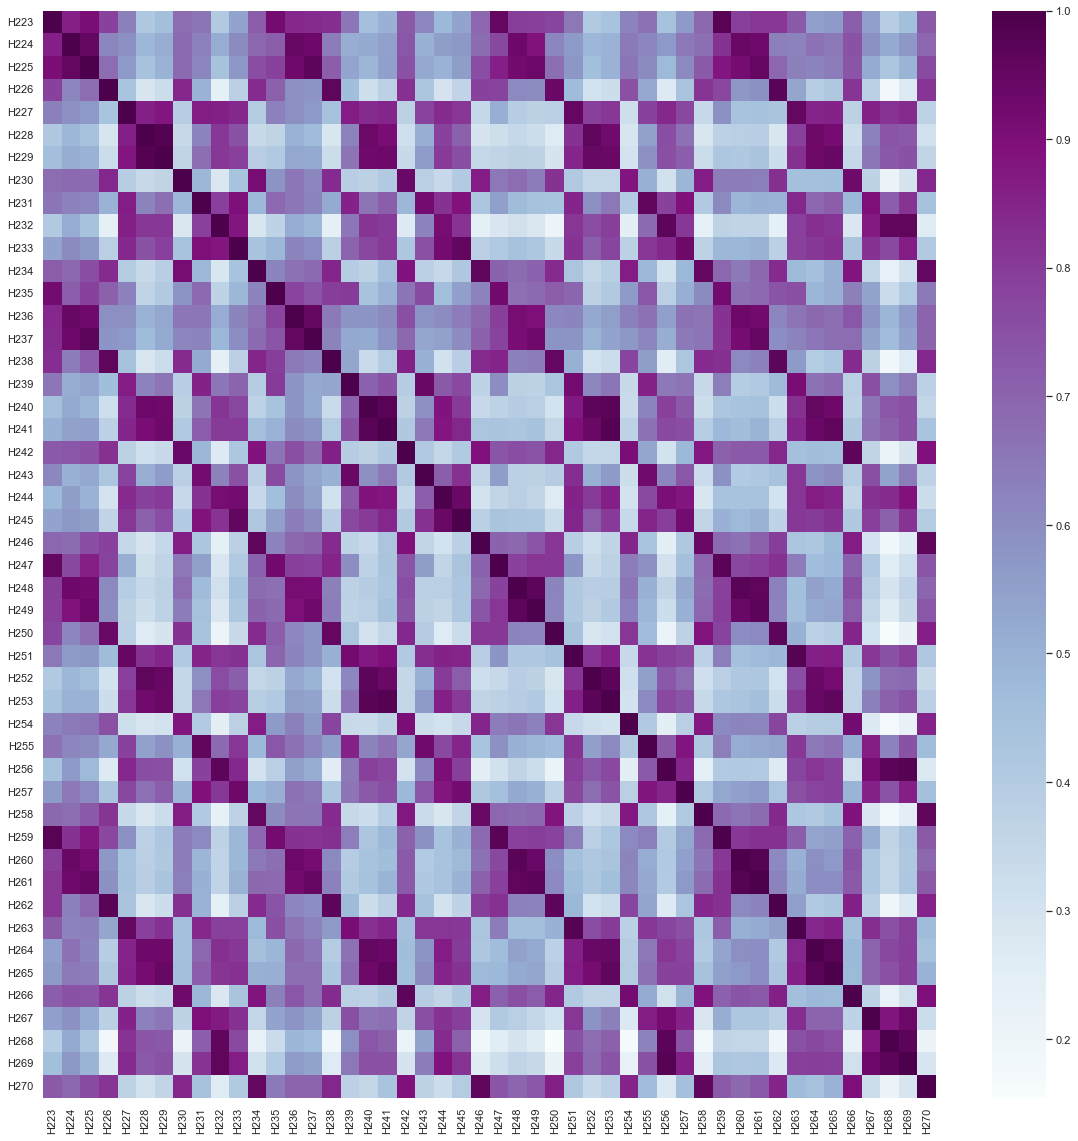

In [11]:
# Checking the data correlation between the variables 
# -> Using and Heatmap (Usando um mapa de calor para verificar a correlação entre as variáveis).

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap="BuPu");

---

### # Second Stage -> Method 1:

→ Nesse estágio iremos aplicar o primeiro método de resolução prosposto.

→ No caso, utilizaremos o conceito da equação do primeiro grau [ y = ax + b ] e linearização. Por que isso é relevante?
→ Bem, a equação do primeiro grau quando plotamos em um gráfico, temos a sua representação por uma reta, a qual possui inclinação influenciada pela letra **a** e por onde cruzar o eixo y influenciado pela letra **b**.

→ Um efeito similar a esse é obtido quando utilizamos o conceito de linearização, o qual consiste em encontrar uma equação do primeiro grau que represente de forma satisfatório a maioria dos dados de um determinado dataset.

→ De maneira grosseira, um gráfico parecido é obtido quando utilizamos o mesmo valor de uma variável, tanto no eixo **x**, quanto no eixo **y**. Um exemplo pode ser visto na imagem abaixo:


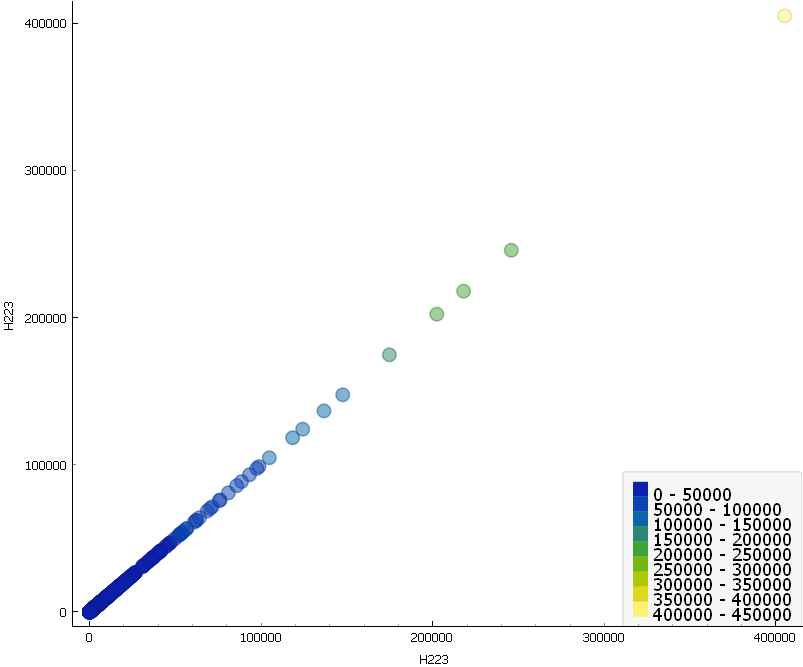

In [12]:
from IPython.display import Image
Image("Grafico X por X.png", width=650, height=600)

→ Agora, expandindo a análise, podemos dizer que: Mantendo um dos eixos fixo com essa mesma variável, por exemplo, mantendo o eixo y como sendo a pessoa **H223**, e o eixo x agora a **H224**. Podemos dizer que, **quanto mais próximo os dados estiverem dessa reta, mais iguais são os dados** e assim, a grosso modo, podemos dizer que são parentes, bem aproximadamente.

→ Vale ressaltar que, esta não será a análise principal realizada como resposta, mas sim uma complementar / brincadeira mais lógica e matemática que realmente funcional e aplicável no dia a dia...

→ Abaixo temos a representação de todos os pacientes entre eles mesmo, mas utilizando apenas 10 dos 65 mil dados fornecidos.

In [13]:
# Deixei comentado isso aqui pq senão leva em torno de 45 minutos para processar todos os dados.

# colss = ['H223', 'H224', 'H225', 'H226', 'H227', 'H228', 'H229', 'H230', 'H231', 'H232', 'H233', 'H234', 'H235', 'H236', 'H237', 'H238']
# new_df = df.iloc[0:10000,1:]
# sns.pairplot(new_df)
# plt.show();

---

### # Third Stage -> Method 2:

O segundo método consiste em utilizar uma matriz de proximidade. Isto é, Serão comparados todos os genes entre si, ou pelo menos uma parte deles e criado uma matriz relacionando o quão igual o valor desse gene para a pessoa A é da pessoa B e da C, e assim por diante. P

Além disso, depois de separar os indivíduos estes serão agrupados de acordo com a proximidade dessas características.

Apenas a título de curiosidade, iremos utilizar de alguns métodos matemáticos (e.g. método do cotovelo, WCSS etc) para tentar agrupar esses dados, de uma maneira não muito eficiente... apenas a título de curiosidade mesmo.

#### # Select the features

No caso apenas selecionaremos as colunas de maior interesse (removeremos a coluna 0 que tem o nome dos genes)

In [14]:
# iloc is a method used to 'slice' data 
# 'slice' is not technically correct as there are methods 'slice' which are a bit different
# The term used by pandas is 'selection by position'
# --> The first argument of identifies the rows we want to keep && --> The second - the columns
# When choosing the columns, e.g. a:b, we will keep columns a,a+1,a+2,...,b-1 ; so column b is excluded
new_df = df.iloc[:,1:]
# for this particular case, we are choosing all columns but the first one that has the categorical data...
# Note column indices in Python start from 0

new_df.head()


,H223,H224,H225,H226,H227,H228,H229,H230,H231,H232,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
0,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,2,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1216,1228,1022,912,491,449,466,727,774,576,...,980,932,360,450,484,926,803,630,537,582
3,189,114,110,289,186,148,169,258,145,131,...,117,286,137,90,105,275,101,56,87,81
4,74,38,55,127,30,17,45,100,33,8,...,28,157,34,20,15,139,54,25,21,47


### Selecting the number of clusters

#### WCSS (within-cluster sum of squares)
WCSS is a measure developed within the ANOVA framework. It gives a very good idea about the different distance between different clusters and within clusters, thus providing us a rule for deciding the appropriate number of clusters.

In [15]:
# Create an empty list
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,15):           # Também tinha feito com range(1, 48), mas com 15 clusters já tava mais que ótimo...
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(new_df)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)

In [16]:
# Let's see what we got
wcss

[41784243195145.34,
 25188528819929.664,
 18449355005879.69,
 15478484538720.887,
 12918173763310.594,
 11031132624224.281,
 10456172557742.88,
 9173705588702.473,
 8435184688789.882,
 7679528298032.931,
 6999346230216.319,
 6409160170581.151,
 5914836265272.249,
 5545979188428.601]

#### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

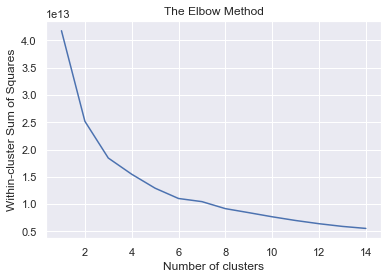

In [17]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
number_clusters = range(1,15)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters, wcss)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')

A Princípio são NO MÁXIMO 10 Famílias diferentes ! --> TALVEZ 7.

In [18]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(10)

In [19]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(new_df)

KMeans(n_clusters=10)

### Matriz de Proximidade:

Variação percentual = [(valor_maior - Valor_menor) / Valor_menor] * 100

-> fonte: https://calculadorajuroscompostos.com.br/como-calcular-a-variacao-percentual-entre-dois-valores/

---

-> Troquei a equação acima pela função isclose da biblioteca math:

--> https://docs.python.org/pt-br/3/library/math.html


In [65]:
# Diferença máxima permitida entre o valor de um gene e outro:
diff = 15                                           # [%]
diff = diff/100                                     # [%]
#-----------------------------------------------------------------#
# Gerando um novo DataFrame:
new_df = df.iloc[0:100,1:]

matriz_proximidade = []
soma = 0

# Matriz para percorrer as linhas do DataFrame:
for i in range(0, new_df.shape[0]):                 # -> De 0 a 1000
    linha = []
        # Matriz para percorrer as colunas do DataFrame:
    for j in range(0, new_df.shape[1]):           # -> De 0 a 48
        iteracao = []
        
        for k in range(0, new_df.shape[1]):
            # variacao_percentual = (new_df.iloc[i,j] - new_df.iloc[i,j+1]) / new_df.iloc[i,j+1] -> Divisão por 0 da ruim...
            # utilizando essa função da biblioteca math, ela retorno True se o valor do segundo argumento
            # for proximo ao primeiro, considerando uma aproximação de até diff (15 %)
            variacao_percentual = math.isclose(new_df.iloc[i,k], new_df.iloc[i,j], rel_tol=diff, abs_tol=0.0)
            #print(variacao_percentual)
        
            if variacao_percentual == True:
                iteracao.append(1)
            else:
                iteracao.append(0)
    
        for item in iteracao:
            soma += item

        linha.append(soma)
        soma = 0

    matriz_proximidade.append(linha)
    soma = 0
#-----------------------------------------------------------------#
        

In [66]:
print(matriz_proximidade[0:5])

[[38, 38, 38, 8, 38, 38, 38, 38, 8, 38, 38, 8, 38, 38, 8, 2, 38, 38, 38, 38, 38, 38, 8, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 8, 38, 8, 38, 2, 38, 38, 8, 38], [46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 2, 46, 46, 46, 46, 46, 46, 46, 46, 2, 46, 46, 46, 46, 46, 46, 46, 46, 46], [4, 4, 11, 12, 13, 9, 13, 16, 15, 16, 16, 6, 18, 19, 19, 16, 14, 14, 5, 16, 15, 16, 18, 12, 14, 12, 15, 16, 16, 18, 16, 2, 17, 16, 18, 14, 5, 15, 10, 12, 3, 9, 12, 12, 18, 19, 16, 16], [5, 15, 13, 6, 5, 12, 8, 7, 12, 14, 9, 7, 17, 12, 4, 11, 12, 4, 9, 14, 15, 9, 9, 11, 10, 17, 4, 5, 6, 15, 13, 12, 15, 16, 13, 7, 11, 14, 15, 6, 11, 14, 15, 7, 16, 4, 13, 9], [3, 6, 6, 3, 13, 7, 6, 5, 10, 3, 11, 5, 11, 11, 10, 4, 3, 3, 6, 9, 5, 5, 14, 4, 7, 6, 10, 5, 12, 14, 5, 6, 14, 3, 8, 2, 9, 7, 11, 2, 10, 6, 6, 3, 6, 9, 5, 9]]


Feita a matriz de proximidade, podemos agrupar dados em clustters e por fim dizer quais elementos pertencem a mesma família.

In [123]:
len(matriz_proximidade)

npArray = np.array(matriz_proximidade)
print (npArray.shape)

(100, 48)


In [200]:
# Recreating the dataFrame with the new matrix:

# Creating columns names:
columns = df.columns.values[1:]
# Creating rows names:
rows = df.iloc[0:100,0]

# Creating a dataframe:
df_matriz = pd.DataFrame(npArray, rows, columns)

df_matriz.head()


,H223,H224,H225,H226,H227,H228,H229,H230,H231,H232,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,38,38,38,8,38,38,38,38,8,38,...,38,8,38,8,38,2,38,38,8,38
ENSG00000000005,46,46,46,46,46,46,46,46,46,46,...,2,46,46,46,46,46,46,46,46,46
ENSG00000000419,4,4,11,12,13,9,13,16,15,16,...,10,12,3,9,12,12,18,19,16,16
ENSG00000000457,5,15,13,6,5,12,8,7,12,14,...,15,6,11,14,15,7,16,4,13,9
ENSG00000000460,3,6,6,3,13,7,6,5,10,3,...,11,2,10,6,6,3,6,9,5,9


#### Refazendo o processo dos clusters:

In [201]:
# Matrix without columns and rows names:
df_new_matriz = pd.DataFrame(npArray)

df_new_matriz.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,38,38,38,8,38,38,38,38,8,38,...,38,8,38,8,38,2,38,38,8,38
1,46,46,46,46,46,46,46,46,46,46,...,2,46,46,46,46,46,46,46,46,46
2,4,4,11,12,13,9,13,16,15,16,...,10,12,3,9,12,12,18,19,16,16
3,5,15,13,6,5,12,8,7,12,14,...,15,6,11,14,15,7,16,4,13,9
4,3,6,6,3,13,7,6,5,10,3,...,11,2,10,6,6,3,6,9,5,9


In [164]:
# Create an empty list
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,15):           # Também tinha feito com range(1, 48), mas com 15 clusters já tava mais que ótimo...
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(df_new_matriz)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)

Text(0, 0.5, 'Within-cluster Sum of Squares')

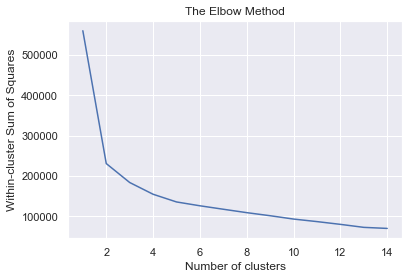

In [165]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
number_clusters = range(1,15)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters, wcss)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')

Após feita esse pré-agrupamento dos dados, observou-se que o número de clusters possíveis diminuiu. Ficando em torno de 3 a 4 possíveis famílias.

In [169]:
# Transpose the dataframe:
df_transpose = df_matriz.transpose()

df_transpose.head()

Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000005249,ENSG00000005302,ENSG00000005339,ENSG00000005379,ENSG00000005381,ENSG00000005421,ENSG00000005436,ENSG00000005448,ENSG00000005469,ENSG00000005471
H223,38,46,4,5,3,11,8,7,3,8,...,10,10,17,11,4,48,5,5,4,2
H224,38,46,4,15,6,4,3,9,2,5,...,10,5,18,9,1,48,8,2,3,2
H225,38,46,11,13,6,10,10,6,3,10,...,9,11,14,12,4,48,4,2,5,2
H226,8,46,12,6,3,3,4,4,5,11,...,8,8,11,13,5,48,3,4,2,8
H227,38,46,13,5,13,10,5,6,6,17,...,10,12,14,11,4,48,1,3,4,7


In [ ]:
# Check if we worked correctly
from sklearn import preprocessing
# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
df_scaled = preprocessing.scale(df_transpose)
df_scaled

In [170]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(df_transpose)
# Check the result
identified_clusters

array([10, 10,  0, 12,  8,  6,  6,  0,  3,  1,  3,  5,  3,  0,  2,  5,  3,
        0,  1,  0,  3,  3,  8,  6,  3,  7,  0,  5, 11,  9,  0,  6,  3,  0,
        3,  1, 10,  0,  9, 13, 10,  2,  5,  4, 11,  1,  2,  5])

In [202]:
# Create a copy of the data
data_with_clusters = df_transpose.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000005302,ENSG00000005339,ENSG00000005379,ENSG00000005381,ENSG00000005421,ENSG00000005436,ENSG00000005448,ENSG00000005469,ENSG00000005471,Cluster
H223,38,46,4,5,3,11,8,7,3,8,...,10,17,11,4,48,5,5,4,2,10
H224,38,46,4,15,6,4,3,9,2,5,...,5,18,9,1,48,8,2,3,2,10
H225,38,46,11,13,6,10,10,6,3,10,...,11,14,12,4,48,4,2,5,2,0
H226,8,46,12,6,3,3,4,4,5,11,...,8,11,13,5,48,3,4,2,8,12
H227,38,46,13,5,13,10,5,6,6,17,...,12,14,11,4,48,1,3,4,7,8
H228,38,46,9,12,7,5,4,4,3,17,...,8,17,9,3,48,5,3,4,2,6
H229,38,46,13,8,6,5,4,5,6,17,...,12,11,9,1,48,8,4,3,2,6
H230,38,46,16,7,5,8,3,7,3,12,...,4,17,11,5,48,7,3,2,2,0
H231,8,46,15,12,10,12,5,6,3,12,...,10,17,10,1,48,6,6,5,1,3
H232,38,46,16,14,3,1,10,2,3,17,...,11,17,8,3,48,5,6,4,5,1


#### Resultado utilizando o método 2:

-> Família 0: H225, H230, H236, H240, H242, H249, H253, H256, H260

-> Família 1: H232, H241, H258, H268

-> Família 2: H237, H264, H269

-> Família 3: H231, H233, H235, H239, H243, H244, H247, H255, H257

-> Família 4: H266

-> Família 5: H234, H238, H250, H265, H270

-> Família 6: H228, H229, H246, H254

-> Família 7: H248

-> Família 8: H227, H245

-> Família 9: H252, H261

-> Família 10: H223, H224, H259, H263

-> Família 11: H251, H267

-> Família 12: H226

-> Família 13: H262 


#### Resultado utilizando o método 1:

-> Família 0: H223, H235, H247, H259

-> Família 1: H224, H225, H236, H237

-> Família 2: H226, H238, H262

-> Família 3: H227, H251, H263

-> Família 4: H228, H229, H240, H252

-> Família 5: H230

-> Família 6: H231, H241, H253, H255, H257, H264, H265

-> Família 7: H232, H233, H256, H268

-> Família 8: H234

-> Família 9: H239, H243

-> Família 10: H242, H254, H266

-> Família 11: H244, H245, H269

-> Família 12: H246, H258, H270

-> Família 13: H248, H249, H260, H261

-> Família 14: H250

In [188]:
# shape = data_with_clusters.shape[0]
# cluster = []

# for i in range(0, shape+1):
#     if data_with_clusters["Cluster"][i] == 0:
#         cluster[0] += data_with_clusters["Unnamed: 0"][i]
#     elif data_with_clusters["Cluster"][i] == 1:
#         cluster[1] += data_with_clusters["Unnamed: 0"][i]
#     elif data_with_clusters["Cluster"][i] == 2:
#         cluster[2] += data_with_clusters["Unnamed: 0"][i]
#     elif data_with_clusters["Cluster"][i] == 3:
#         cluster[3] += data_with_clusters["Unnamed: 0"][i]
#     elif data_with_clusters["Cluster"][i] == 4:
#         cluster[4] += data_with_clusters["Unnamed: 0"][i]
#     elif data_with_clusters["Cluster"][i] == 5:
#         cluster[5] += data_with_clusters["Unnamed: 0"][i]
#     elif data_with_clusters["Cluster"][i] == 6:
#         cluster[6] += data_with_clusters["Unnamed: 0"][i]
#     elif data_with_clusters["Cluster"][i] == 7:
#         cluster[7] += data_with_clusters["Unnamed: 0"][i]
#     elif data_with_clusters["Cluster"][i] == 8:
#         cluster[8] += data_with_clusters["Unnamed: 0"][i]
#     elif data_with_clusters["Cluster"][i] == 9:
#         cluster[9] += data_with_clusters["Unnamed: 0"][i]    
#     elif data_with_clusters["Cluster"][i] == 10:
#         cluster[10] += data_with_clusters["Unnamed: 0"][i]
#     elif data_with_clusters["Cluster"][i] == 11:
#         cluster[11] += data_with_clusters["Unnamed: 0"][i]
#     elif data_with_clusters["Cluster"][i] == 12:
#         cluster[12] += data_with_clusters["Unnamed: 0"][i]

IndexError: list index out of range